In [1]:
using DifferentialEquations
using Plots
include("NBody.jl")
using .NBody

In [2]:
mass = Float64[5, 4, 5, 5]
qb = [[1.0,-1.0,1.0], [1, 3, 0.0], [-1, -2, 0.0], [0,0,0.0]]
pb = [zeros(3), zeros(3), zeros(3), zeros(3)]
bb = Bodies(qb, pb, mass, 1.0);

In [3]:
tf = 50.0
dt = 1.0/100
time = (0.0,tf)
prob = ODEProblem(NBody.nbdy_eqs!, bb.u, time, bb);
sol = solve(prob, Vern9(), reltol=1.0e-12, abstol=1.0e-12, saveat=dt);

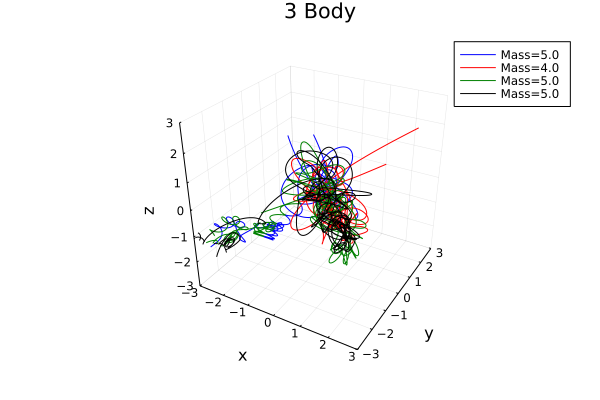

In [4]:
label1 = string("Mass=", mass[1])
label2 = string("Mass=", mass[2])
label3 = string("Mass=", mass[3])
label4 = string("Mass=", mass[4])
plot3d(1, xaxis=("x", (-3, 3)), yaxis=("y", (-3, 3)), zaxis=("z", (-3, 3)), label=false, title="3 Body", marker=2, markercolor="black", dpi=300)
plot3d!(sol[1,:],sol[2,:],sol[3,:],color=:blue,label=label1)
plot3d!(sol[4,:],sol[5,:],sol[6,:],color=:red,label=label2)
plot3d!(sol[7,:],sol[8,:],sol[9,:],color=:green,label=label3)
plot3d!(sol[10,:],sol[11,:],sol[12,:],color=:black,label=label4)

In [ ]:
aa = Animation()
outfreq = 20
lim = 4.0
tail = 200

n = length(sol.t)
for i = 1:outfreq:n
    bi = max(1,i-tail)
    ei = i
    inds = bi:ei
    # induce a slight camera angle sweep, in degrees (azimuth, altitude)
    plt = plot3d(1, xaxis=("x",(-lim, lim)), yaxis=("y",(-lim, lim)), zaxis=("z", (-lim, lim)), camera=(i*0.02, 30), label=false, marker=2, markercolor="black", dpi=300)
    plt = plot3d!(sol[1,inds], sol[2,inds], sol[3,inds], label=false, color = :blue)
    plt = plot3d!(sol[4,inds], sol[5,inds], sol[6,inds], label=false, color = :red)
    plt = plot3d!(sol[7,inds], sol[8,inds], sol[9,inds], label=false, color = :green)
    plt = plot3d!(sol[10,inds], sol[11,inds], sol[12,inds], label=false, color = :black)
 
    plt = plot3d!([sol[1,i]], [sol[2,i]], [sol[3,i]], seriestype = :scatter, color=:blue, label=label1, marker=2)
    plt = plot3d!([sol[4,i]], [sol[5,i]], [sol[6,i]], seriestype = :scatter, color=:red, label=label2, marker=2)
    plt = plot3d!([sol[7,i]], [sol[8,i]], [sol[9,i]], seriestype = :scatter, color=:green, label=label3, marker=2)
    plt = plot3d!([sol[10,i]], [sol[11,i]], [sol[12,i]], seriestype = :scatter, color=:black, label=label4, marker=2)
    
    frame(aa, plt)
end

In [ ]:
gif(aa, "4body3D.gif",fps=15)